In [429]:
import os

import numpy as np

from matplotlib import pyplot

from scipy import optimize

%matplotlib inline

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

In [430]:
data = pd.read_csv('Dataset3.csv', delimiter=',')

In [431]:
display(data)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [432]:
data.drop(['id','CustomerId','Surname'], axis=1, inplace=True)

In [433]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [434]:
columnas_categoricas = data.select_dtypes(include=['object']).columns

for columna in columnas_categoricas:
    le = LabelEncoder()
    data[columna] = le.fit_transform(data[columna])

In [435]:
display(data)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [436]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int32  
 2   Gender           165034 non-null  int32  
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int32(2), int64(4)
memory usage: 12.6 MB


In [437]:
X = data.iloc[:, :10]
y = data.iloc[:, 10]

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Datos de entramiento')
print(X_train)
print(y_train) 

Datos de entramiento
        CreditScore  Geography  Gender   Age  Tenure    Balance  \
90879           822          2       1  37.0       8       0.00   
24401           535          0       1  37.0       5       0.00   
151368          817          0       1  25.0       2   89994.71   
49205           577          2       1  43.0       8       0.00   
117254          598          0       0  35.0       3       0.00   
...             ...        ...     ...   ...     ...        ...   
73349           626          0       0  37.0       4       0.00   
109259          711          1       0  28.0       7  150329.15   
50057           681          2       1  48.0       7  142905.51   
5192            444          0       0  36.0       7       0.00   
128037          802          0       0  35.0      10       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
90879               2        1.0             1.0        169038.02  
24401               2        1.0      

In [439]:
print('Datos de prueba')
print(X_test)
print(y_test)

Datos de prueba
        CreditScore  Geography  Gender   Age  Tenure    Balance  \
51719           659          1       1  48.0       4  123593.22   
77286           756          1       0  54.0       4  130878.75   
43625           636          0       1  46.0       5       0.00   
26151           613          0       1  47.0       3       0.00   
60732           711          1       0  51.0       4  116957.28   
...             ...        ...     ...   ...     ...        ...   
153611          645          0       1  21.0       2       0.00   
19022           659          1       0  44.0       9   92833.89   
121710          749          0       0  47.0       1       0.00   
65429           749          0       1  40.0       5       0.00   
113643          675          1       1  31.0       9  136492.22   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
51719               2        0.0             1.0        134094.02  
77286               4        1.0           

In [440]:
# Convertir la matriz a un arreglo de NumPy
filas = np.array(X_test)

# Extraer la décima fila del arreglo
decima_fila = filas[9]

# Imprimir los valores de la décima fila separados por coma
print(','.join(map(str, decima_fila)))


538.0,0.0,0.0,31.0,1.0,121513.31,1.0,1.0,0.0,156791.27


In [441]:
def FuncionNormalizacion(X_train):
    X_norm = X_train.copy()
    mu = np.zeros(X_train.shape[1])
    sigma = np.zeros(X_train.shape[1])
    
    mu = np.mean(X_train, axis=0)
    sigma = np.std(X_train, axis=0)
    X_norm = (X_train - mu)/sigma
    
    return X_norm, mu, sigma

In [442]:
X_norm, mu, sigma = FuncionNormalizacion(X_train)

print('Media calculada:\n', mu)
print('-'*70)
print('Desviacion estandar:\n', sigma)
print('-'*70)
print('Valores normalizados:\n', X_norm)

Media calculada:
 CreditScore           656.316420
Geography               0.649269
Gender                  0.564922
Age                    38.142030
Tenure                  5.017239
Balance             55508.201672
NumOfProducts           1.554977
HasCrCard               0.754247
IsActiveMember          0.497822
EstimatedSalary    112468.087851
dtype: float64
----------------------------------------------------------------------
Desviacion estandar:
 CreditScore           80.154816
Geography              0.816520
Gender                 0.495767
Age                    8.890038
Tenure                 2.808456
Balance            62823.043365
NumOfProducts          0.547526
HasCrCard              0.430533
IsActiveMember         0.499995
EstimatedSalary    50364.288346
dtype: float64
----------------------------------------------------------------------
Valores normalizados:
         CreditScore  Geography    Gender       Age    Tenure   Balance  \
90879      2.067045   1.654254  0.877585 

In [443]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

In [444]:
z = 0
g = sigmoid(z)
print('g(', z, ')=',g)

g( 0 )= 0.5


In [445]:
m = X_train.shape[0]
X_train = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [446]:
def calcularCosto(theta, X_train, y_train):
    m = y_train.size
    
    J = 0
    h = sigmoid(X_train.dot(theta.T))
    J = (1/m)*np.sum(-y_train.dot(np.log(h))-(1-y_train.dot(np.log(1-h))))
    return J

In [447]:
def descensoGradiente(theta, X_train, y_train, num_iter, alpha):
    m = y_train.shape[0]

    theta = theta.copy()
    J_history = []

    for i in range(num_iter):
        h = sigmoid(X_train.dot(theta.T))
        theta = theta - (alpha / m) * (h - y_train).dot(X_train)
        
        J_history.append(calcularCosto(theta, X_train, y_train))
    
    return theta, J_history

[0.00018948140305675748, 0.00038629233173757, 0.0005828582921753534, 0.0007791789989107148, 0.0009752541666675289, 0.0011710835104327359, 0.0013666667455352588, 0.0015620035877239008, 0.001757093753244113, 0.0019519369589136321, 0.0021465329221971546, 0.002340881361279797, 0.002534981995139373, 0.0027288345436177323, 0.0029224387274911353, 0.003115794268539114, 0.003308900889612365, 0.003501758314699902, 0.0036943662689944714, 0.003886724478957414, 0.004078832672381988, 0.004270690578455918, 0.004462297927822622, 0.004653654452641473, 0.004844759886646684, 0.005035613965205448, 0.005226216425374564, 0.005416567005956816, 0.005606665447554783, 0.00579651149262496, 0.0059861048855301665, 0.006175445372590935, 0.006364532702135692, 0.006553366624550185, 0.006741946892325573, 0.006930273260105457, 0.007118345484732147, 0.007306163325291575, 0.007493726543156999, 0.007681034902032426, 0.007868088167994116, 0.008054886109531268, 0.008241428497586628, 0.008427715105594381, 0.00861374570951872

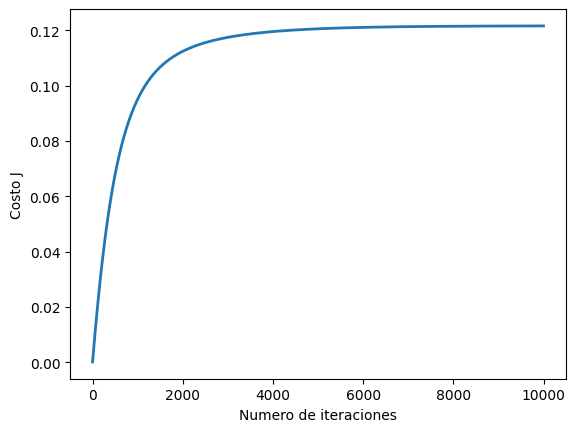

In [448]:
num_iter = 10000
alpha = 0.01

theta = np.zeros(11)
theta, J_history = descensoGradiente(theta, X_train, y_train, num_iter, alpha)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('Theta calculadas por el descenso de la gradiente: {:s}'.format(str(theta)))

X_array = np.array([1, 538.0, 0.0, 0.0, 31.0, 1.0, 121513.31, 1.0, 1.0, 0.0, 156791.27])
cancelado = sigmoid(np.dot(X_array, theta))

print('El resultado entre verdadero(1) y falso(0) utilizando el descenso de la gradiente: {:.0f}'.format(cancelado))

In [449]:
print(X_test.shape)

(33007, 10)


In [450]:
m = X_test.shape[0]
print(m)

33007


In [451]:
n = X_test.shape[1]
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)
print(n)
print(X_test)

10
[[1.0000000e+00 6.5900000e+02 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.3409402e+05]
 [1.0000000e+00 7.5600000e+02 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 7.1667100e+03]
 [1.0000000e+00 6.3600000e+02 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 4.8986180e+04]
 ...
 [1.0000000e+00 7.4900000e+02 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 8.2396000e+02]
 [1.0000000e+00 7.4900000e+02 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.8781659e+05]
 [1.0000000e+00 6.7500000e+02 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.7252674e+05]]


In [452]:
def funcionCosto(theta, X_test, y_test):
    m = y_test.size
    
    epsilon = 1e-8
    
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(X_test.dot(theta.T))
    
    J = (1 / m) * np.sum(-y_test.dot(np.log(h+epsilon)) - (1-y_test).dot(np.log(1 - h + epsilon)))
    grad = (1 / m) * (h - y_test).dot(X_test)
    
    return J, grad

In [453]:
theta_iniciales = np.zeros(n+1)
print(theta_iniciales)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [454]:
cost, grad = funcionCosto(theta_iniciales, X_test, y_test)

print('Costo en theta inicial: {:.3f}'.format(cost))
print('Gradiente en theta inicial:')
print('[{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f}]'.format(*grad))

Costo en theta inicial: 0.693
Gradiente en theta inicial:
[0.29,189.95,0.17,0.19,9.70,1.46,12575.67,0.49,0.22,0.19,32137.50]


In [455]:
theta_test = np.array([0.29,189.95,0.17,0.19,9.70,1.46,12575.67,0.49,0.22,0.19,32137.50])

cost, grad = funcionCosto(theta_test, X_test, y_test)

print('Costo en theta prueba: {:.2f}'.format(cost))
print('Gradientes en theta de prueba:')
print('[{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f}]'.format(*grad))

Costo en theta prueba: 14.51
Gradientes en theta de prueba:
[0.79,518.45,0.49,0.47,28.74,3.98,40254.48,1.27,0.60]


In [456]:
configuracion = {'maxiter': 1000}

res = optimize.minimize(funcionCosto,theta_iniciales,(X_test,y_test),jac=True,method='TNC',options=configuracion)

cost = res.fun

theta = res.x

print('Costo encontrado por la funcion optimize.minimize: {:.2f}'.format(cost))
print('Thetas resultantes de la funcion optmize.minimize')
print('[{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f}]'.format(*theta))

C:\Users\hlope\AppData\Local\Temp\ipykernel_5288\414324256.py:3: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(funcionCosto,theta_iniciales,(X_test,y_test),jac=True,method='TNC',options=configuracion)


Costo encontrado por la funcion optimize.minimize: 0.40
Thetas resultantes de la funcion optmize.minimize
[-2.49,-0.00,0.09,-0.65,0.10,-0.01,0.00,-0.83,-0.17]


In [457]:
def prediccion(theta, X_test):
    m = X_test.shape[0]
    
    p = np.zeros(m)
    
    p = np.round(sigmoid(X_test.dot(theta.T)))
    
    return p

In [458]:
prob = sigmoid(np.dot([1,538.0,0.0,0.0,31.0,1.0,121513.31,1.0,1.0,0.0,156791.27], theta))
print('Con estas caracteristicas tenemos un resultado de: {:.0f}'.format(prob))

p = prediccion(theta, X_test)
print('Precision del entrenamiento: {:.2f}%'.format(np.mean(p == y_test)*100))

Con estas caracteristicas tenemos un resultado de: 0
Precision del entrenamiento: 82.70%
